In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from numpy.random import choice

In [168]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

In [169]:
df = pd.read_csv('stud_math.csv', encoding="utf-8")

### Первичный осмотр данных

In [170]:
df.sample(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
196,GP,M,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
259,GP,F,17,U,LE3,T,2.0,NaN,services,services,course,father,1.0,4.0,0.0,no,no,yes,yes,yes,-12.0,yes,NaN,yes,3.0,4.0,1.0,NaN,0.0,0.0
336,GP,F,19,R,GT3,A,3.0,1.0,services,NaN,home,other,1.0,3.0,1.0,no,no,yes,no,NaN,-9.0,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0
224,GP,F,16,U,GT3,T,4.0,4.0,NaN,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,0.0,70.0
304,GP,M,19,U,GT3,T,3.0,3.0,other,other,home,other,1.0,2.0,1.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,20.0,65.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
335,GP,F,17,U,GT3,T,3.0,4.0,services,other,NaN,mother,1.0,3.0,0.0,no,NaN,no,no,yes,-9.0,yes,yes,no,4.0,4.0,5.0,5.0,16.0,75.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
117,GP,M,16,U,GT3,T,3.0,3.0,other,services,home,father,2.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,NaN,no,5.0,4.0,2.0,5.0,0.0,65.0


In [171]:
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP
sex,F,F,F,F,F,M,M,F,M,M,F,F,M,M,M
age,18,17,15,15,16,16,16,17,15,15,15,15,15,15,15
address,U,U,U,U,U,U,NaN,U,U,U,U,U,U,U,U
famsize,NaN,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,NaN,GT3,GT3,LE3,GT3,GT3
Pstatus,A,NaN,T,T,T,T,T,A,A,NaN,T,NaN,T,T,A
Medu,4,1,1,4,3,4,2,4,3,3,4,2,4,4,2
Fedu,4,1,1,2,3,3,2,4,2,4,4,40,4,3,2
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,teacher,services,health,teacher,other
Fjob,teacher,other,other,NaN,other,other,other,teacher,other,other,health,other,services,other,other


In [172]:
df.shape

(395, 30)

In [173]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

<AxesSubplot:>

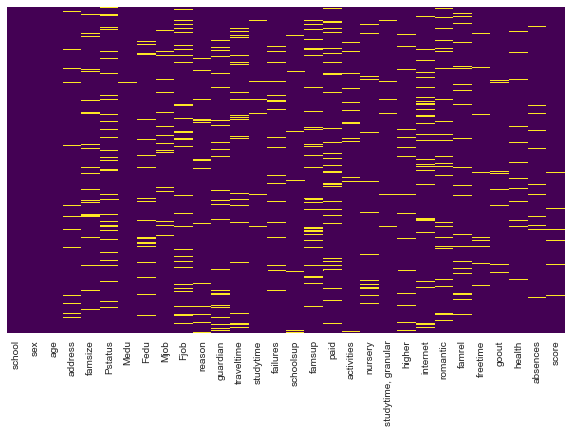

In [174]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

* Почти во всех столюбцах есть пропуски. Наибольшее количество в Pstatus и Paid

In [175]:
df_copy = df.copy(deep=True)

In [176]:
df_copy = df_copy.dropna(how="any")
df_copy.shape

(97, 30)

In [177]:
df_copy.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.071662,-0.056929,0.143682,-0.220209,0.320914,0.220209,0.057039,0.040115,0.106748,0.037152,0.142780,-0.186407
Medu,-0.071662,1.000000,0.684379,-0.248099,-0.042491,-0.135065,0.042491,-0.032146,-0.032350,0.023938,-0.124250,0.101253,0.064914
Fedu,-0.056929,0.684379,1.000000,-0.162149,-0.001350,-0.189926,0.001350,-0.059084,-0.135575,-0.087894,0.086575,0.059172,-0.014236
traveltime,0.143682,-0.248099,-0.162149,1.000000,-0.034571,-0.029138,0.034571,-0.134113,-0.071376,-0.094331,0.147160,-0.148719,-0.094874
studytime,-0.220209,-0.042491,-0.001350,-0.034571,1.000000,-0.016541,-1.000000,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
failures,0.320914,-0.135065,-0.189926,-0.029138,-0.016541,1.000000,0.016541,-0.095520,-0.043110,-0.021022,0.057279,0.239602,-0.314698
"studytime, granular",0.220209,0.042491,0.001350,0.034571,-1.000000,0.016541,1.000000,-0.025253,0.226503,0.129162,0.067115,0.018695,0.029742
famrel,0.057039,-0.032146,-0.059084,-0.134113,0.025253,-0.095520,-0.025253,1.000000,0.084336,0.069922,0.178145,0.016312,-0.026742
freetime,0.040115,-0.032350,-0.135575,-0.071376,-0.226503,-0.043110,0.226503,0.084336,1.000000,0.381049,0.120714,0.093512,0.068862
goout,0.106748,0.023938,-0.087894,-0.094331,-0.129162,-0.021022,0.129162,0.069922,0.381049,1.000000,-0.033206,0.094859,-0.079187


In [178]:
df_copy[["studytime", "studytime, granular"]].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [179]:
df.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                   float64
Fedu                   float64
Mjob                    object
Fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [180]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### Binary Data

In [181]:
# binary data
df_binary = df.loc[:, ["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       "Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic", 
                       "score"]]

In [182]:
# binary data without NaN
df_binary_noNaN = df.loc[:, ["school", 
                             "sex", 
                             "address", 
                             "famsize", 
                             "Pstatus", 
                             "schoolsup", 
                             "famsup", 
                             "paid", 
                             "activities", 
                             "nursery", 
                             "higher", 
                             "internet", 
                             "romantic", 
                             "score"]].dropna(how="any")

In [183]:
df_binary_noNaN.shape

(171, 14)

In [184]:
# binary data with dummies
df_binary_dummies = pd.get_dummies(df_binary_noNaN, columns=["school", 
                       "sex", 
                       "address", 
                       "famsize", 
                       "Pstatus", 
                       "schoolsup", 
                       "famsup", 
                       "paid", 
                       "activities", 
                       "nursery", 
                       "higher", 
                       "internet", 
                       "romantic"], drop_first = True)

In [185]:
df_binary_dummies.head(10)

,score,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
3,75.0,0,0,1,0,1,0,1,1,1,1,1,1,1
4,50.0,0,0,1,0,1,0,1,1,0,1,1,0,0
5,75.0,0,1,1,1,1,0,1,1,1,1,1,1,0
7,30.0,0,0,1,0,0,1,1,0,0,1,1,0,0
8,95.0,0,1,1,1,0,0,1,1,0,1,1,1,0
10,45.0,0,0,1,0,1,0,1,1,0,1,1,1,0
14,80.0,0,1,1,0,0,0,1,0,0,1,1,1,1
16,70.0,0,0,1,0,1,0,1,1,1,1,1,1,0
20,75.0,0,1,1,0,1,0,0,0,0,1,1,1,0
23,60.0,0,1,1,1,1,0,1,0,1,1,1,1,0


In [186]:
corrMatt = df_binary_dummies.corr()

<AxesSubplot:>

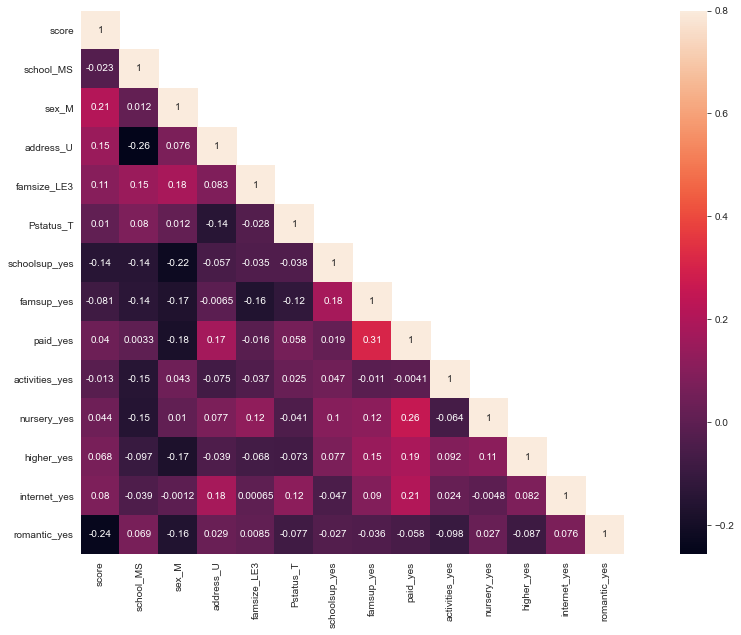

In [187]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [188]:
df_binary.isna().sum()

school         0
sex            0
address       17
famsize       27
Pstatus       45
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
score          6
dtype: int64

#### Заполняем пропущенные данные в binary data

In [189]:
# sex -- famsize

# sex -- schoolsup
# Мужской пол студента и доп. образов. поддержка негативно скоррелированны

def sex_schoolsup(row):
    elements = ['yes', 'no'] 
    weights_M = [0.2, 0.8] # вероятности (веса) выбора элемента, если независимая переменная == "M"
    weights_F = [0.8, 0.2] # вероятности (веса) выбора элемента, если независимая переменная == "F"
    if pd.isnull(row.schoolsup):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.schoolsup


# school -- address

# sex -- romantic

# famsize -- nursery

# address -- paid

# address -- internet

# nursery -- paid

# nursery -- higher

# paid -- higher

# paid -- internet

# Pstatus -- internet

# famsup -- paid



# drop Pstatus

# drop activities


# def fill_age(row):
#     if pd.isnull(row.Age):
#         if row.Pclass == 1:
#             return age_1
#         elif row.Pclass == 2:
#             return age_2
#         return age_3
#     return row.Age

In [190]:
df["schoolsup"] = df.apply(sex_schoolsup, axis = 1)

In [191]:
df["schoolsup"].value_counts()

no     341
yes     54
Name: schoolsup, dtype: int64

In [192]:
# sex -- higher
# Мужской пол студента и его желание получить высшее обр. негативно скореллированны

def sex_higher(row):
    elements = ['yes', 'no'] 
    weights_M = [0.25, 0.75] # вероятности (веса) выбора элемента, если независимая переменная == "M"
    weights_F = [0.75, 0.25] # вероятности (веса) выбора элемента, если независимая переменная == "F"
    if pd.isnull(row.higher):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.higher

In [193]:
df["higher"] = df.apply(sex_higher, axis = 1)

In [194]:
df["higher"].value_counts()

yes    362
no      33
Name: higher, dtype: int64

In [195]:
# sex -- famsize
# интересна пол. корр. мужского пола ребенка и небольшого размера семьи
# Возможно, объяснение в том, что в развивающихся странах родители стремятся получить мальчика, 
# поэтому девочки чаще встречаются в больших семьях

def sex_famsize(row):
    elements = ['LE3', 'GT3'] 
    weights_M = [0.80, 0.20]
    weights_F = [0.20, 0.80]
    if pd.isnull(row.famsize):
        if row.sex == "M":
            return choice(elements, p=weights_M)
        return choice(elements, p=weights_F)
    return row.famsize

In [196]:
df["famsize"] = df.apply(sex_famsize, axis = 1)

In [197]:
df["famsize"].value_counts()

GT3    276
LE3    119
Name: famsize, dtype: int64

In [199]:
# famsize -- famsup
# больше семья ("GT3") - выше вероятность семейной образовательной поддержки

def famsize_famsup(row):
    elements = ['yes', 'no'] 
    weights_LE3 = [0.20, 0.80]
    weights_GT3 = [0.80, 0.20]
    if pd.isnull(row.famsup):
        if row.famsize == "LE3":
            return choice(elements, p=weights_LE3)
        return choice(elements, p=weights_GT3)
    return row.famsup

In [200]:
df["famsup"] = df.apply(famsize_famsup, axis = 1)

In [201]:
df["famsup"].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

In [203]:
# school -- address
# Дети, живущие за городом, чаще ходят в школу MS

def school_address(row):
    elements = ['U', 'R'] 
    weights_GP = [0.80, 0.20]
    weights_MS = [0.20, 0.80]
    if pd.isnull(row.address):
        if row.school == "GP":
            return choice(elements, p=weights_GP)
        return choice(elements, p=weights_MS)
    return row.address   

In [204]:
df["address"] = df.apply(school_address, axis = 1)

In [205]:
df["address"].value_counts()

U    306
R     89
Name: address, dtype: int64

In [207]:
df.isna().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                 0
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                  0
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [133]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                  0
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [68]:
elements = ['one', 'two', 'three'] 
weights = [0.2, 0.3, 0.5]

from numpy.random import choice
print(choice(elements, p=weights))

three


In [27]:
df_binary.shape

(395, 13)

In [28]:
df_binary.loc[:, "sex":].dropna(how="all").shape


(395, 12)

graph for school


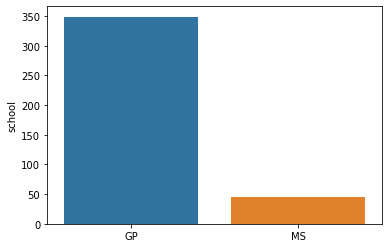

graph for sex


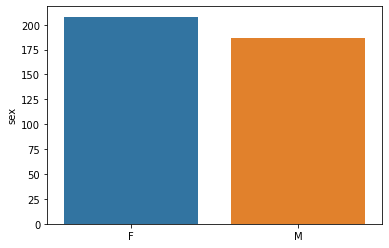

graph for address


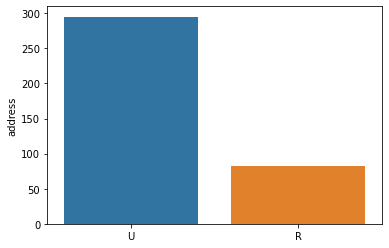

graph for famsize


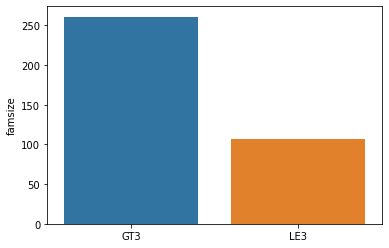

graph for Pstatus


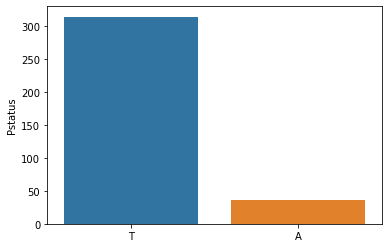

graph for schoolsup


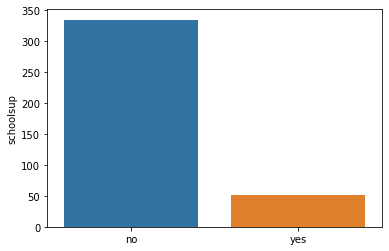

graph for famsup


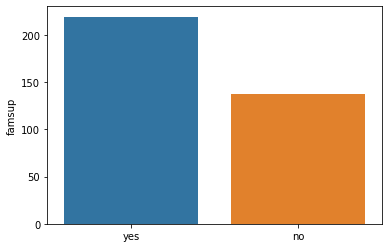

graph for paid


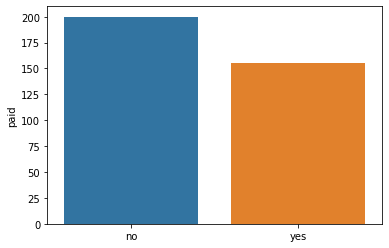

graph for activities


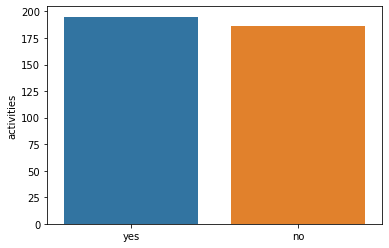

graph for nursery


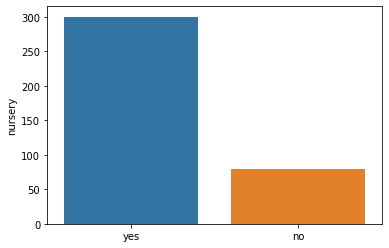

graph for higher


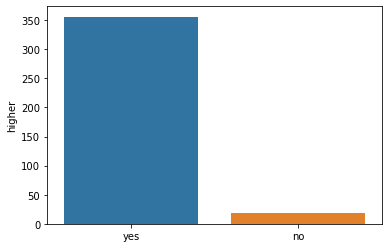

graph for internet


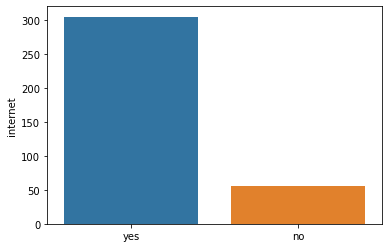

graph for romantic


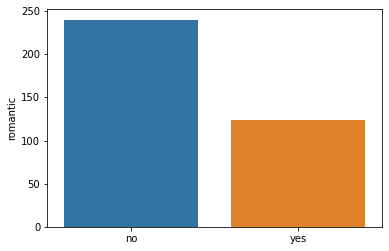

In [29]:
for i in df_binary.columns:
    bin_num = df_binary[i].value_counts(normalize=False)
    print("graph for %s" % (i))
    sns.barplot(x = bin_num.index, y = bin_num)
    plt.show()

<AxesSubplot:ylabel='school'>

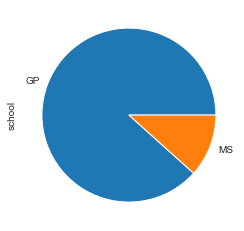

In [37]:
df_binary["school"].value_counts().plot(kind="pie")

<AxesSubplot:>

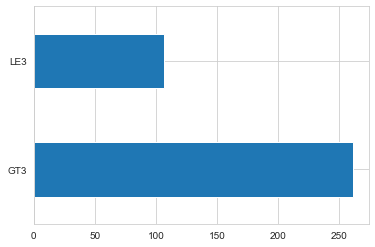

In [38]:
df_binary["famsize"].value_counts().plot(kind="barh")

### Nominal Data

In [31]:
# nominal data
df_nominal = df.loc[:, ["Mjob", "Fjob", "reason", "guardian"]]

In [32]:
# nominal data without NaN
df_nominal_noNaN = df.loc[:, ["Mjob", "Fjob", "reason", "guardian"]].dropna(how="any")

In [33]:
df_nominal_noNaN.shape

(298, 4)

graph for Mjob


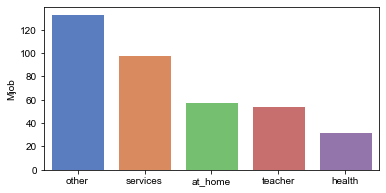

graph for Fjob


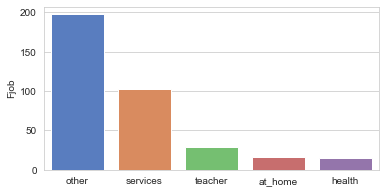

graph for reason


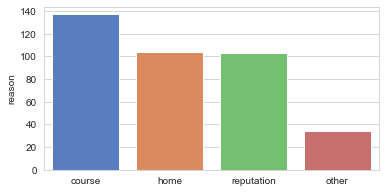

graph for guardian


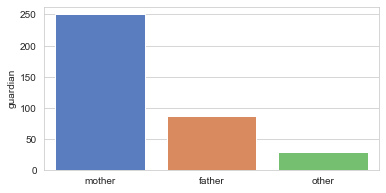

In [34]:
for i in df_nominal.columns:
    nom_num = df_nominal[i].value_counts()
    print("graph for %s" % (i))
    plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.barplot(x = nom_num.index, y = nom_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

<AxesSubplot:xlabel='Mjob', ylabel='score'>

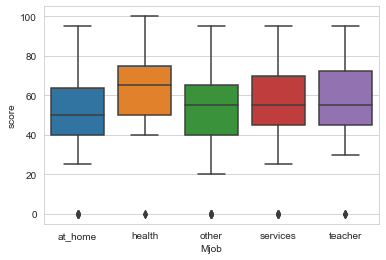

In [165]:
sns.boxplot(x="Mjob", y="score", data = df)

<AxesSubplot:xlabel='Fjob', ylabel='score'>

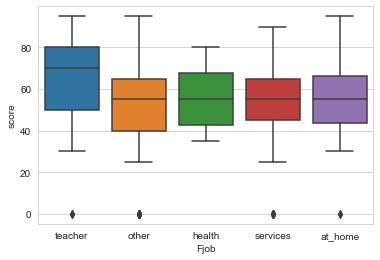

In [166]:
sns.boxplot(x="Fjob", y="score", data = df)

<AxesSubplot:xlabel='reason', ylabel='score'>

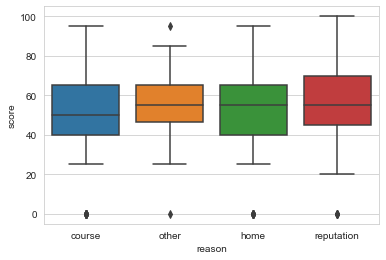

In [167]:
sns.boxplot(x="reason", y="score", data = df)

<AxesSubplot:xlabel='guardian', ylabel='score'>

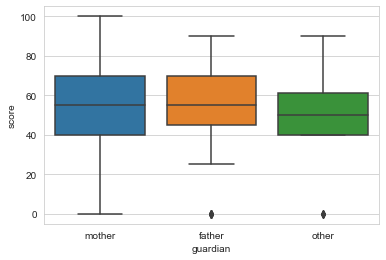

In [168]:
sns.boxplot(x="guardian", y="score", data = df)

In [170]:
df.groupby("Mjob").score.mean()

Mjob
at_home     45.689655
health      60.625000
other       49.527559
services    54.744898
teacher     55.181818
Name: score, dtype: float64

### Ordinal Data

In [143]:
# ordinal data
df_ordinal = df.loc[:, ["Medu", 
                        "Fedu", 
                        "traveltime", 
                        "studytime", 
                        "failures", 
                        "famrel", 
                        "freetime", 
                        "goout", 
                        "health"]]

In [144]:
# ordinal data without NaN
df_ordinal_noNaN = df.loc[:, ["Medu", 
                        "Fedu", 
                        "traveltime", 
                        "studytime", 
                        "failures", 
                        "famrel", 
                        "freetime", 
                        "goout", 
                        "health"]].dropna(how="any")

In [145]:
df_ordinal_noNaN.shape

(275, 9)

graph for Medu


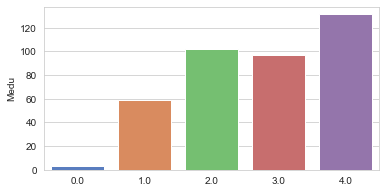

graph for Fedu


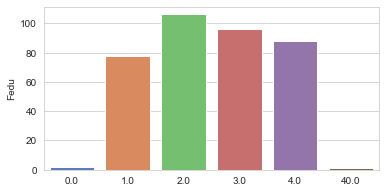

graph for traveltime


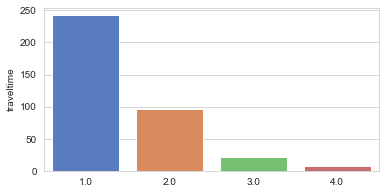

graph for studytime


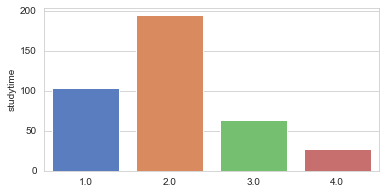

graph for failures


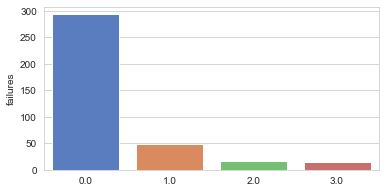

graph for famrel


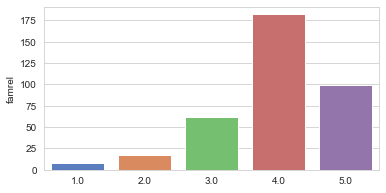

graph for freetime


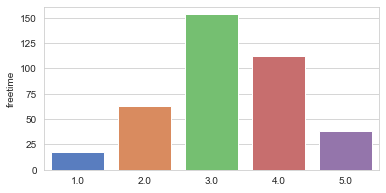

graph for goout


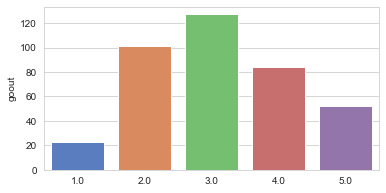

graph for health


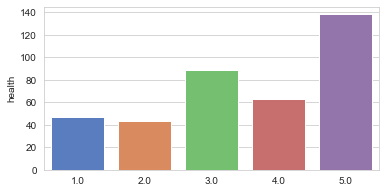

In [146]:
for i in df_ordinal.columns:
    ord_num = df_ordinal[i].value_counts()
    print("graph for %s" % (i))
    plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.barplot(x = ord_num.index, y = ord_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

### Ratio Data

In [152]:
# ratio data
df_ratio = df.loc[:, ["age", "absences", "score"]]

In [153]:
# ratio data without NaN
df_ratio_noNaN = df.loc[:, ["age", "absences", "score"]].dropna(how="any")

In [154]:
df_ratio_noNaN.shape

(378, 3)

graph for age


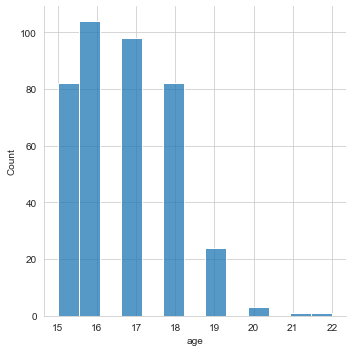

graph for absences


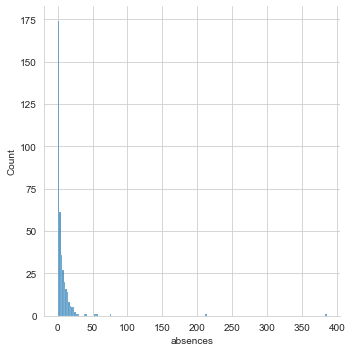

graph for score


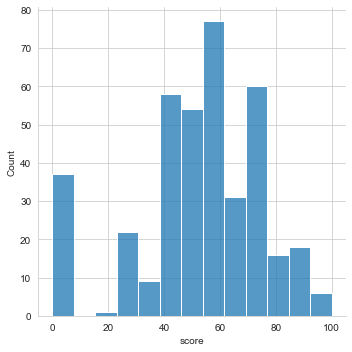

In [156]:
for i in df_ratio.columns:
    rat_num = df_ratio[i]
    print("graph for %s" % (i))
    #plt.subplots(figsize=(6,3))
    sns.set_style("whitegrid")
    sns.displot(df_ratio, x = i)
#   sns.barplot(x = ord_num.index, y = ord_num, ci = None, palette = "muted", orient = 'v')
    plt.show()

In [161]:
zzz = df[df["absences"] < 100]

In [163]:
zzz

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<AxesSubplot:>

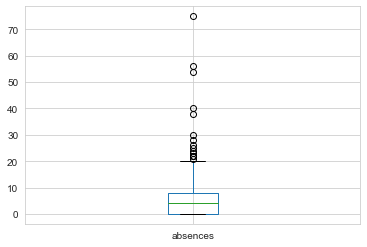

In [164]:
zzz.absences.plot(kind="box")

In [157]:
df["absences"].value_counts(dropna=False)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

### school

In [45]:
df["school"].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [46]:
df["school"] = df.school.map({"GP": 1, "MS": 0})

In [47]:
df["school"].value_counts()

1    349
0     46
Name: school, dtype: int64

In [48]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,1,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,1,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,1,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,1,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,1,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,1,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,1,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,1,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,1,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,1,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### age

<AxesSubplot:ylabel='Frequency'>

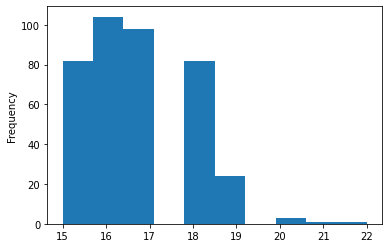

In [32]:
df["age"].plot(kind="hist")

### Fedu - Образование отца

In [18]:
df.sort_values(by='Fedu', ascending=False)[:10]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,...,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,...,-6.0,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,...,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
224,GP,F,16,U,GT3,T,4.0,4.0,NaN,services,...,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,0.0,70.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,...,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,...,-3.0,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,...,-9.0,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
100,GP,M,16,U,GT3,T,4.0,4.0,services,services,...,-3.0,yes,yes,no,4.0,5.0,5.0,4.0,14.0,25.0
233,GP,M,16,U,GT3,T,4.0,4.0,health,other,...,-6.0,yes,yes,no,4.0,2.0,4.0,1.0,2.0,65.0


In [65]:
df["Fedu"] = df.Fedu.apply(lambda x: 4.0 if x > 4.0 else x)

<AxesSubplot:ylabel='Frequency'>

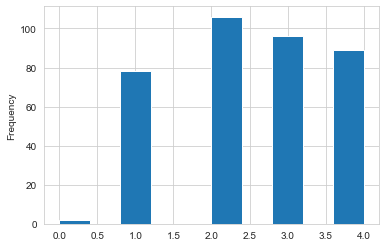

In [66]:
df["Fedu"].plot(kind="hist")

### famrel

In [141]:
df["famrel"] = df.famrel.apply(lambda x: 1.0 if x < 0 else x)

### Internet

In [31]:
df["internet"].value_counts(dropna=False, normalize=True)

yes    0.772152
no     0.141772
NaN    0.086076
Name: internet, dtype: float64

In [49]:
df.corr()

,school,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
school,1.000000,-0.377610,0.133708,0.060082,-0.254034,0.092700,-0.059999,-0.092700,0.031147,-0.035052,0.006257,0.037339,-0.013642,0.044524
age,-0.377610,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,0.133708,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,0.060082,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,-0.254034,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,0.092700,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,-0.059999,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",-0.092700,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.031147,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,-0.035052,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026


### studytime - время на учебу помимо школы в неделю

In [22]:
df["studytime"].sort_values(ascending=True)[:10]

197    1.0
153    1.0
154    1.0
156    1.0
157    1.0
158    1.0
160    1.0
162    1.0
151    1.0
163    1.0
Name: studytime, dtype: float64

<AxesSubplot:ylabel='Frequency'>

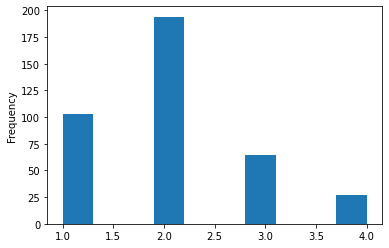

In [24]:
df["studytime"].plot(kind="hist")

In [60]:
df_dummies = pd.get_dummies(df, columns=["schoolsup", 
                                         "famsup", 
                                         "paid", 
                                         "activities", 
                                         "nursery", 
                                         "higher", 
                                         "internet", 
                                         "romantic"], drop_first=True)

In [62]:
df_dummies.schoolsup_yes.value_counts(dropna=False)

0    344
1     51
Name: schoolsup_yes, dtype: int64

In [64]:
df.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

In [67]:
df_dummies.loc[:, "score":].corr()

,score,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
score,1.000000,-0.086598,-0.026812,0.096306,0.018118,0.055006,0.109648,0.068536,-0.136042
schoolsup_yes,-0.086598,1.000000,0.056568,-0.031119,0.027526,0.057690,0.076824,-0.006835,-0.065237
famsup_yes,-0.026812,0.056568,1.000000,0.261448,0.009027,0.079502,0.078934,0.108063,0.024702
paid_yes,0.096306,-0.031119,0.261448,1.000000,0.015359,0.088297,0.126945,0.201688,0.059678
activities_yes,0.018118,0.027526,0.009027,0.015359,1.000000,-0.001200,0.106147,0.017268,-0.024170
nursery_yes,0.055006,0.057690,0.079502,0.088297,-0.001200,1.000000,0.071888,0.005005,0.010502
higher_yes,0.109648,0.076824,0.078934,0.126945,0.106147,0.071888,1.000000,-0.017928,-0.068704
internet_yes,0.068536,-0.006835,0.108063,0.201688,0.017268,0.005005,-0.017928,1.000000,0.107337
romantic_yes,-0.136042,-0.065237,0.024702,0.059678,-0.024170,0.010502,-0.068704,0.107337,1.000000


<AxesSubplot:>

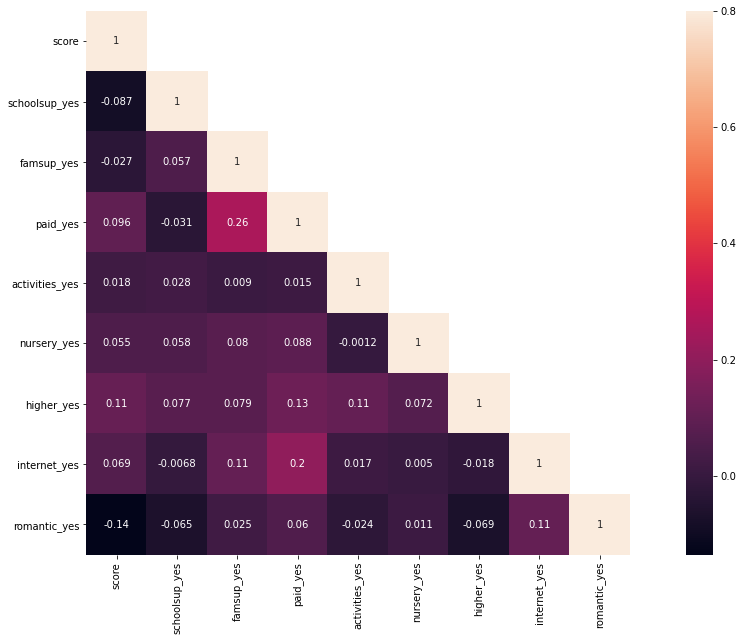

In [70]:
corrMatt = df_dummies.loc[:, "score":].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [68]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [72]:
df_copy_dummies = pd.get_dummies(df_copy, columns=["schoolsup", 
                                         "famsup", 
                                         "paid", 
                                         "activities", 
                                         "nursery", 
                                         "higher", 
                                         "internet", 
                                         "romantic"], drop_first=True)

<AxesSubplot:>

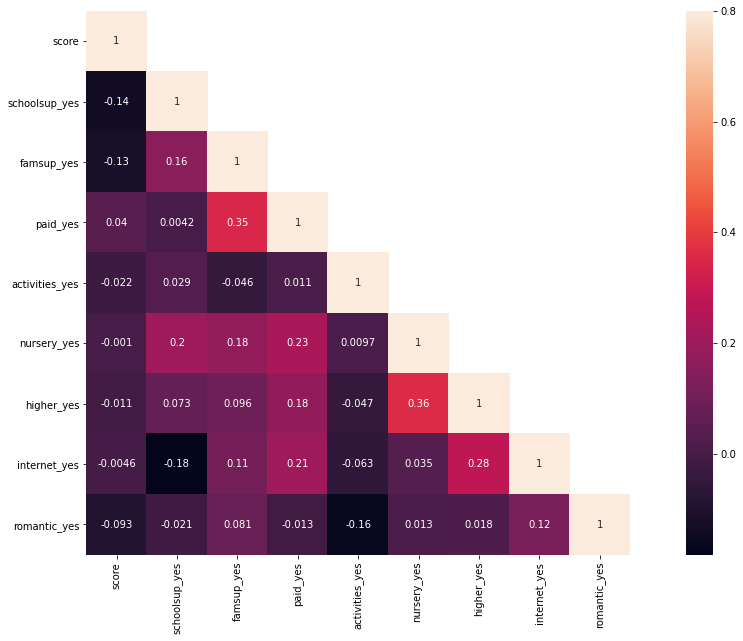

In [73]:
corrMatt = df_copy_dummies.loc[:, "score":].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [88]:
df_sex = df.loc[:, ["sex", "score"]].dropna(how="any")
df_sex.shape

(389, 2)

In [80]:
df_sex_dummies = pd.get_dummies(df_sex, columns=["sex"], drop_first=True)
df_sex_dummies.head()

,score,sex_M
0,30.0,0
1,30.0,0
2,50.0,0
3,75.0,0
4,50.0,0


In [81]:
df_sex_dummies.corr()

,score,sex_M
score,1.000000,0.099285
sex_M,0.099285,1.000000


In [87]:
df_sex = df.loc[:, ["sex", "score"]]
df_sex.shape

(395, 2)

In [85]:
df_sex_dummies = pd.get_dummies(df_sex, columns=["sex"], drop_first=True)
df_sex_dummies.head()


,score,sex_M
0,30.0,0
1,30.0,0
2,50.0,0
3,75.0,0
4,50.0,0


In [86]:
df_sex_dummies.corr()

,score,sex_M
score,1.000000,0.099285
sex_M,0.099285,1.000000
